In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


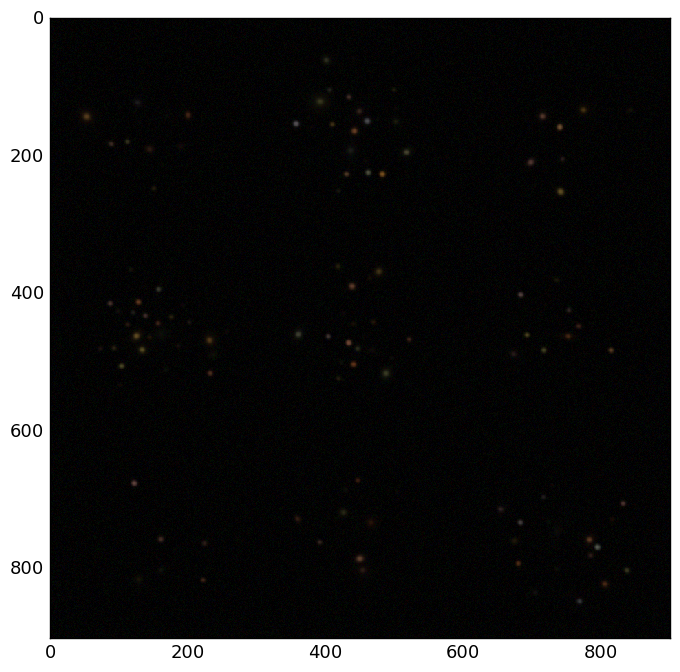

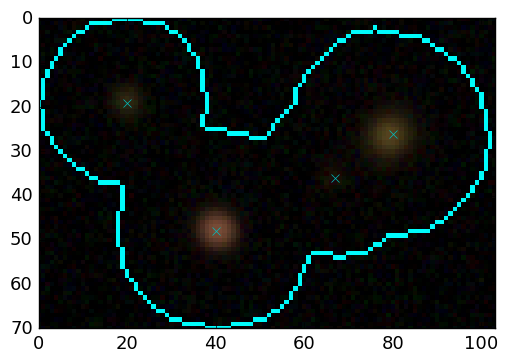

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, contrast=1)

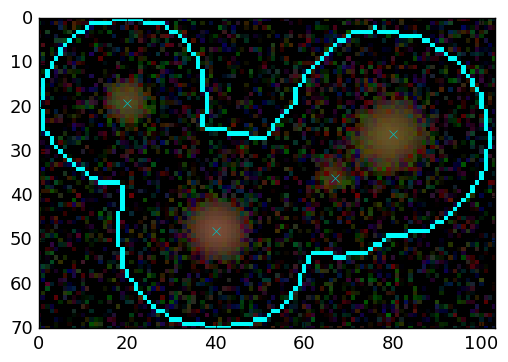

constraints MMMM
0 1.49262602623 0 112.306078189 299 [1, 1, 1, 1]
1 0.00251108156369 299 84.7954084422 299 [4445, 4648, 4084, 4398]
2 0.00197568992521 218 63.6644200904 159 [4748, 4639, 4747, 4754]
3 0.00148220578712 150 47.7405937574 101 [4689, 4416, 4696, 4627]
4 0.00111237103135 173 35.789384239 75 [4428, 4099, 4638, 4373]
5 0.000834895954021 201 26.8284118366 60 [4385, 3970, 4560, 4331]
6 0.000626324558109 231 20.11221944 50 [4540, 4285, 4783, 4496]
7 0.000469796868591 261 15.0803974824 43 [4763, 4460, 4771, 4565]
8 0.000352357233948 0 11.3102974062 38 [4940, 4547, 4674, 4596]
9 0.000264260192853 1 8.48272253855 35 [5082, 4725, 4703, 4698]
10 0.000198184457584 0 6.36204192877 37 [5168, 4894, 4816, 4785]
11 0.000148625908316 0 4.77153150927 40 [5099, 4778, 4733, 4693]


INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.397445887327
INFO:lsst.meas.deblender.proximal:Residual difference 5.2%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.451528133049
INFO:lsst.meas.deblender.proximal:Residual difference 10.0%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.385886471247
INFO:lsst.meas.deblender.proximal:Residual difference 7.5%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.378056228161
INFO:lsst.meas.deblender.proximal:Residual difference 8.9%
INFO:lsst.meas.

12 0.000111457937406 0 3.57864868978 45 [4978, 4649, 4588, 4578]


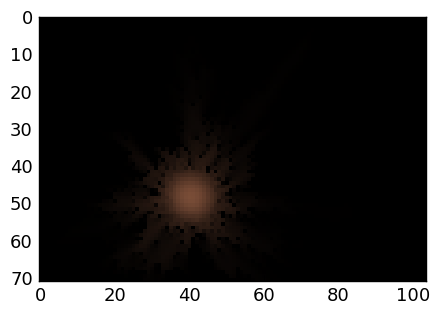

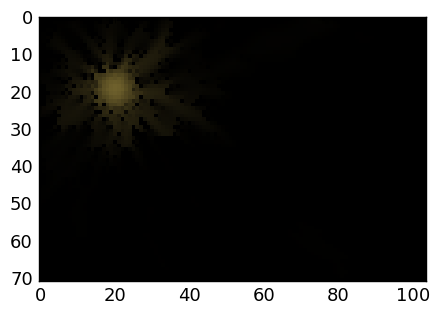

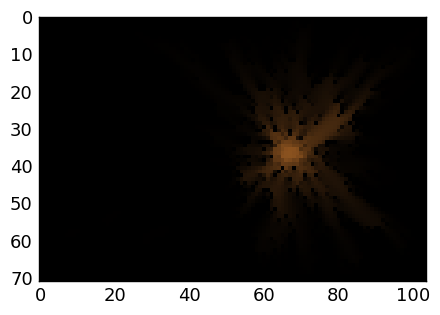

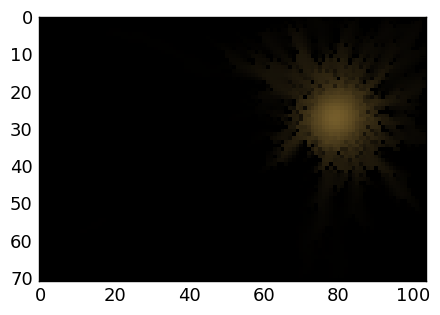

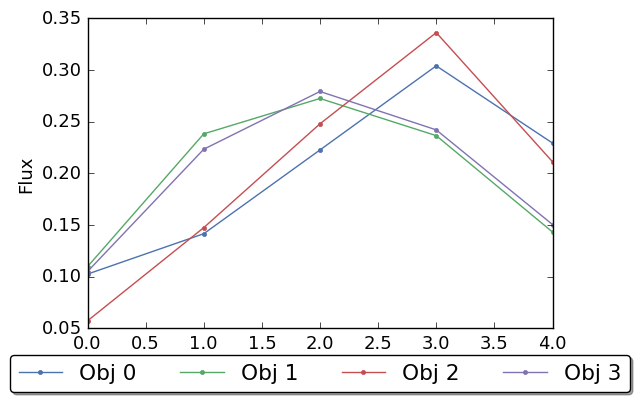

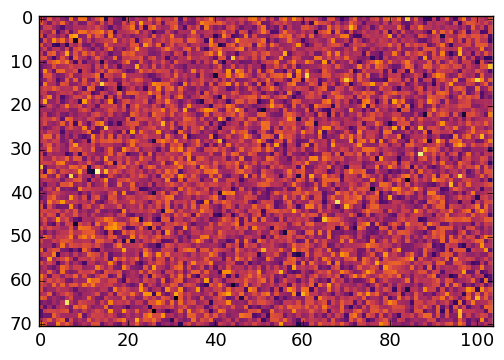

In [3]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True)

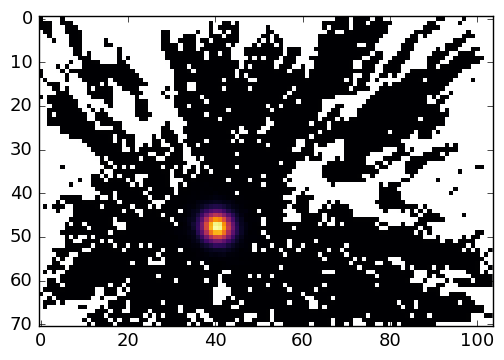

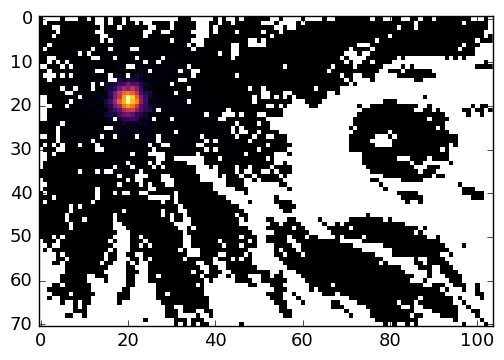

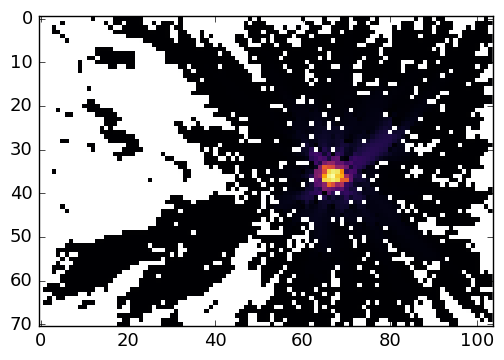

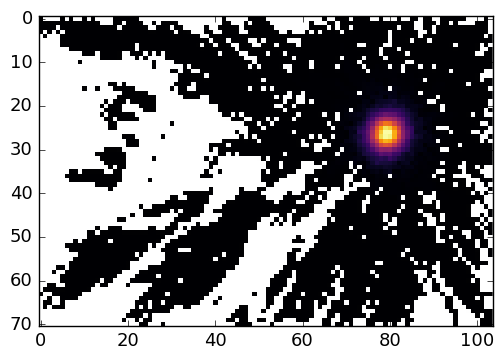

In [4]:
deblend.displayAllTemplates(0)

# Test the deblender with a symmetry constraint

We see that the results of the symmetry deblender look more like galaxies... but the monotonicity deblender does a much better job at matching the flux.

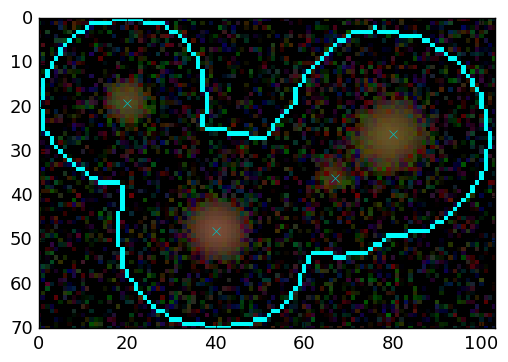

constraints SSSS
0 1.49262602623 0 112.306078189 299 [1, 1, 1, 1]
1 0.00162182677662 216 59.5542211524 299 [2181, 1157, 2706, 1395]
2 0.0018337960896 299 63.1208134266 299 [2371, 1209, 2898, 1693]
3 0.00157757083509 299 48.4824611767 299 [1898, 1050, 2560, 1357]
4 0.00121387349977 196 36.4320626735 299 [1846, 998, 2494, 1294]
5 0.000919398103425 76 27.3282951403 299 [1732, 831, 2384, 1185]
6 0.000693279237532 79 20.495436241 299 [1689, 810, 2357, 1154]
7 0.000521858380498 90 15.3710860206 299 [1697, 804, 2357, 1145]
8 0.000392441934742 97 11.5280672574 299 [1686, 802, 2320, 1132]
9 0.000294913767432 103 8.64590366395 299 [1688, 792, 2306, 1118]
10 0.000221510420547 0 6.48442731706 299 [1675, 782, 2296, 1110]
11 0.00016631528619 0 4.86332008085 299 [1659, 777, 2279, 1104]
12 0.000124838568157 0 3.64748976534 299 [1656, 771, 2268, 1100]
13 9.36857798383e-05 0 2.73561713116 299 [1647, 770, 2262, 1097]
14 7.0295805246e-05 0 2.05171272907 299 [1644, 774, 2256, 1093]
15 5.2739209051e-05 0 1.

INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.585099793105
INFO:lsst.meas.deblender.proximal:Residual difference 21.0%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.738411278447
INFO:lsst.meas.deblender.proximal:Residual difference 22.6%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.896306569323
INFO:lsst.meas.deblender.proximal:Residual difference 20.2%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.25939822347
INFO:lsst.meas.deblender.proximal:Residual difference 23.8%
INFO:lsst.mea

39 5.29675386854e-08 0 0.00154400268423 299 [1637, 765, 2235, 1087]


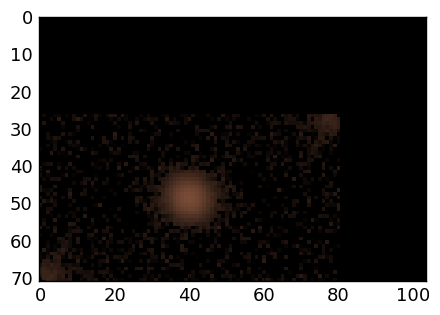

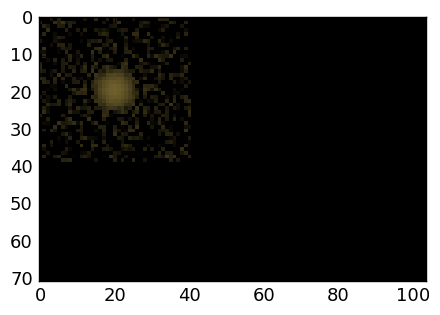

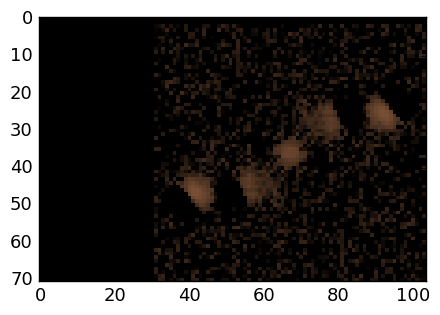

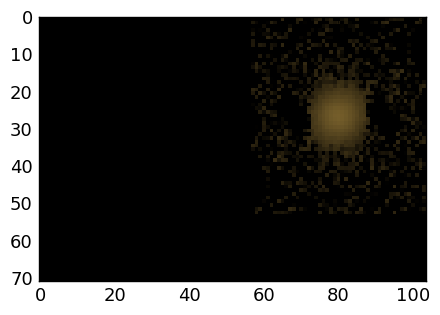

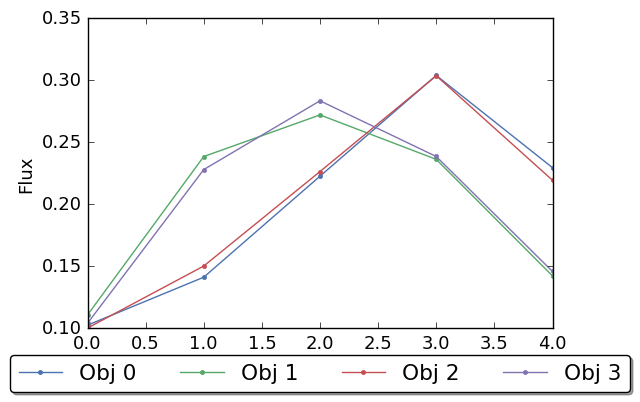

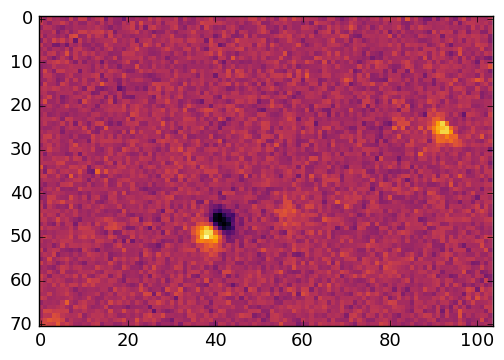

In [5]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, constraints="S", fillValue=1e-2)

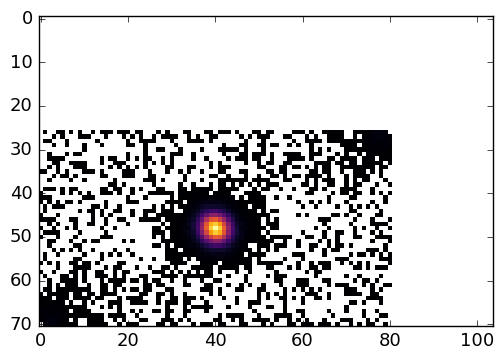

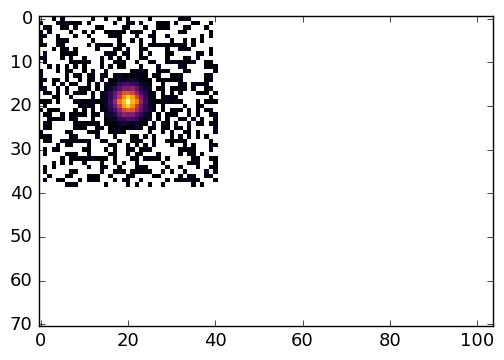

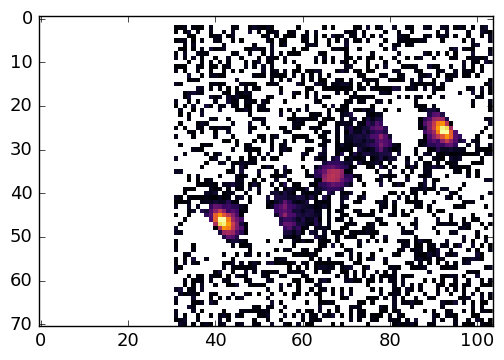

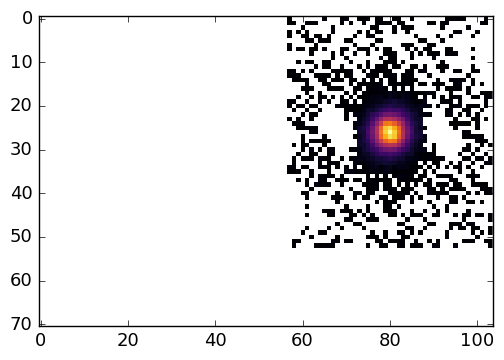

In [6]:
deblend.displayAllTemplates(0)